<a href="https://colab.research.google.com/github/acharyasamir/house-price-prediction-model/blob/main/house_price_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading The Data

In [42]:
import pandas as pd

In [43]:
df = pd.read_csv('/content/dataset/Housing.csv')

In [44]:
print(df.head(5))

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [46]:
print(df.describe())

              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


## Exploratory Data Analysis on Housing Data

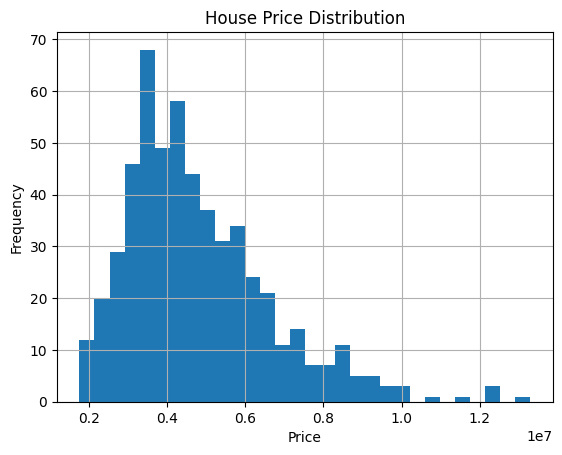

In [47]:
import matplotlib.pyplot as plt

#Histogram of the house prices

df['price'].hist(bins=30)
plt.title('House Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

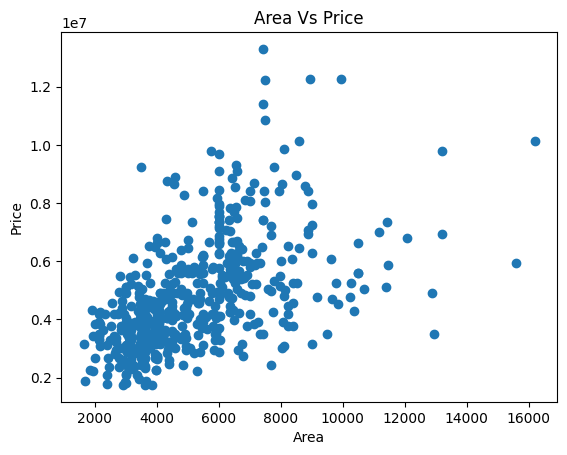

In [48]:
#Scatter plot for Area Vs Price

plt.scatter(df['area'], df['price'])
plt.title('Area Vs Price')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

##Data Preprocessing - Preparing the Data

###Encoding Categorical Variables (mainroad, guestroom, basement)

In [49]:
# Convert categorical variables into dummy variables
df_encoded = pd.get_dummies(df, drop_first=True)

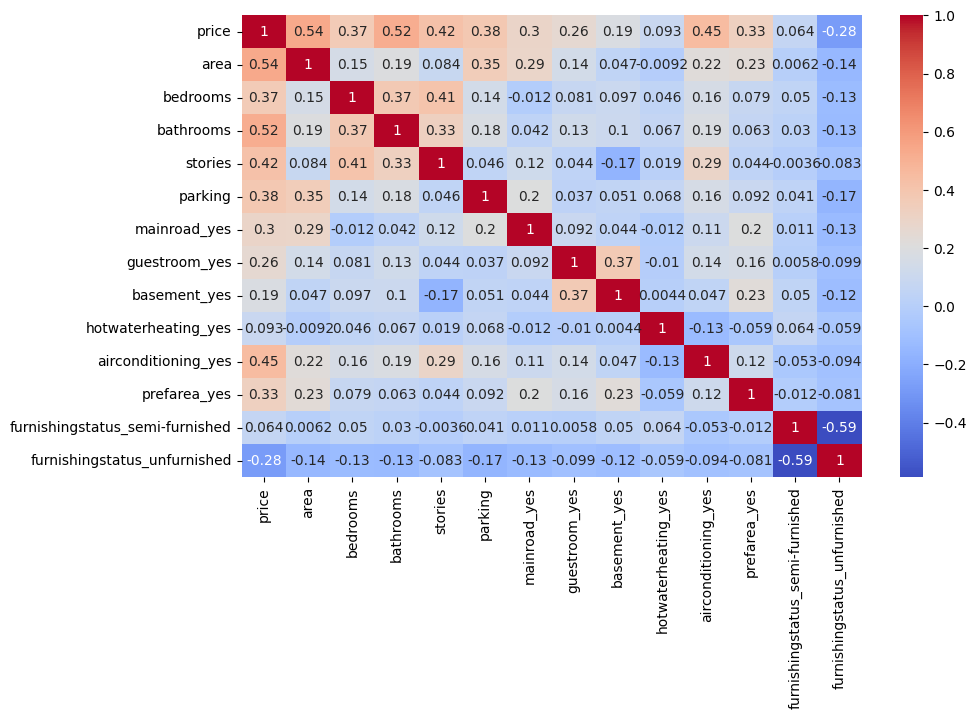

In [34]:
import seaborn as sns

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.show()

### Feature Scaling

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_encoded[['area', 'bedrooms', 'stories', 'parking']] = scaler.fit_transform(df_encoded[['area', 'bedrooms', 'stories', 'parking']])

##Splitting the Data

In [55]:
from sklearn.model_selection import train_test_split

#Define features(x) and target(y)

X = df_encoded.drop('price', axis=1) #all features except price
y = df_encoded['price'] #target variable

#split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
print(X_train)

         area  bedrooms  bathrooms   stories   parking  mainroad_yes  \
46   0.391790  0.047278          2  2.532024  0.355976          True   
93   0.945257  0.047278          2 -0.929397  2.679409          True   
335 -0.615521 -1.308863          1 -0.929397  1.517692          True   
412 -1.171756  0.047278          1  0.224410 -0.805741          True   
471 -0.645962  0.047278          1  0.224410 -0.805741          True   
..        ...       ...        ...       ...       ...           ...   
71   0.391790  1.403419          2  2.532024 -0.805741          True   
106  0.138117  1.403419          2 -0.929397 -0.805741          True   
270 -0.300045  0.047278          2  1.378217  0.355976          True   
435 -0.512207 -1.308863          1 -0.929397 -0.805741          True   
102  0.161178  0.047278          2  2.532024  0.355976          True   

     guestroom_yes  basement_yes  hotwaterheating_yes  airconditioning_yes  \
46           False         False                False    

##Train the Model

In [57]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

#Train the model
model.fit(X_train, y_train)

LinearRegression()

##Model Evaluation

In [59]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

#calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error is {mse}')
print(f'R-squared is {r2}')

Mean Squared Error is 1754318687330.6692
R-squared is 0.6529242642153174


In [60]:
import numpy as np

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error is {rmse}')


Root Mean Squared Error is 1324506.9600914407
